<a href="https://colab.research.google.com/github/Hadeerhub/Breast_Cancer_Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Step 1: Import Required Libraries**
---
---





In [1]:
# 📌 Data Handling Libraries
import numpy as np
import pandas as pd

# 📌 Visualization Libraries
import matplotlib.pyplot as plt  #  For creating static 2D visualizations (graphs, plots)
import seaborn as sns  #  For enhanced statistical data visualization

# 📌 Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV  #  Data splitting & hyperparameter tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder  #  Feature scaling & encoding categorical labels
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 📌 Model Evaluation Libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # ✅ Model performance metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score  # ✅ ROC curve & AUC score evaluation

# 📌 Utility Libraries
import os  #  Interact with the file system (file paths, directory management)
import joblib  #  Save & load trained machine learning models
import io  #  Handle in-memory file operations
import ipywidgets as widgets  # Provides interactive UI elements like buttons, sliders, and text inputs in Jupyter/Colab
from IPython.display import display  # Allows displaying widgets, images, HTML, and other rich content in Jupyter/Colab
from google.colab import files  # Enables file upload and download functionalities in Google Colab

# 📌 Suppress warnings to improve readability
import warnings
warnings.filterwarnings("ignore")  # Ignore unnecessary warning messages

# 📌 Set a consistent visualization style
sns.set_style("whitegrid")  #  Enhances readability of plots with a clean grid background


In [2]:
!pip install gradio
import gradio as gr  #  Create web-based interfaces for ML models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

# **📌 Step 2: Load the Dataset**

---
---

#### Mount Google Drive to access the dataset

---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####  Define dataset path
---

In [4]:
dataset_path='/content/drive/MyDrive/Breast Cancer Classification/Wisconsin Train Dataset/Train dataset.csv'

####  Load the Wisconsin Breast Cancer Dataset


---



In [5]:
data=pd.read_csv(dataset_path)  # this the original dataframe which will remain the same without removing the id col.

# **📌 Step 3: Exploratory Data Analysis (EDA)**
-----
-----

## **Get Insights About the Dataset**

---



####  Shows column names, data types, and missing values
----

In [6]:
from tabulate import tabulate
# 🔍 Dataset Overview in Table Format
dataset_overview = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": data.dtypes.values,
    "Non-Null Count": data.notnull().sum().values,
    "Unique Values": data.nunique().values
})

# Display the table
print("🔍 Dataset Overview:")
print(tabulate(dataset_overview, headers='keys', tablefmt='pretty'))

## OR Use print(data.info())

🔍 Dataset Overview:
+----+-------------------------+-----------+----------------+---------------+
|    |       Column Name       | Data Type | Non-Null Count | Unique Values |
+----+-------------------------+-----------+----------------+---------------+
| 0  |           id            |   int64   |      468       |      468      |
| 1  |        diagnosis        |  object   |      468       |       2       |
| 2  |       radius_mean       |  float64  |      468       |      384      |
| 3  |      texture_mean       |  float64  |      468       |      407      |
| 4  |     perimeter_mean      |  float64  |      468       |      439      |
| 5  |        area_mean        |  float64  |      468       |      443      |
| 6  |     smoothness_mean     |  float64  |      468       |      399      |
| 7  |    compactness_mean     |  float64  |      468       |      444      |
| 8  |     concavity_mean      |  float64  |      468       |      446      |
| 9  |   concave points_mean   |  float64  |

#### Get the shape of the dataset (rows, columns)
---

In [7]:
# This helps to understand the size of the dataset
print("Dataset shape (rows, columns):", data.shape)

Dataset shape (rows, columns): (468, 32)


#### Drop Unnecessary Column
---

In [8]:
UpdatedData = data.drop(columns=['id'], errors='ignore')

#### 🔍 Display the first few rows


---



In [9]:
from tabulate import tabulate
print("\n🔎 First 5 rows of the dataset:")
print(tabulate(UpdatedData.head(), headers='keys', tablefmt='pretty')) # headers='keys'Automatically uses column names , tablefmt='pretty' Provides better readability


🔎 First 5 rows of the dataset:
+---+-----------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+
|   | diagnosis | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | fractal_dimension_mean | radius_se | texture_se | perimeter_se | area_se | smoothness_se | compactness_se | concavity_se | concave points_se | symmetry_se | fractal_dimension_se | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compac

####🔍 Displaythe last 5 rows
---

In [10]:
print("\n🔎 Last 5 rows of the dataset:")
print(tabulate(UpdatedData.tail(), headers='keys', tablefmt='pretty'))


🔎 Last 5 rows of the dataset:
+-----+-----------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+
|     | diagnosis | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | fractal_dimension_mean | radius_se | texture_se | perimeter_se | area_se | smoothness_se | compactness_se | concavity_se | concave points_se | symmetry_se | fractal_dimension_se | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | com

#### ❌ Check for missing values
----

In [11]:
print('\n Missing Values')
print(UpdatedData.isnull().sum())


 Missing Values
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### 📊 Statistic Summary


---



#### 📊 Key Statistics Provided by `.describe()`

##### **1️⃣ Count**
- Number of **non-null values** for each column.

##### **2️⃣ Mean**
- The **average value** of each numerical column.

##### **3️⃣ Standard Deviation (std)**
- A measure of **spread or dispersion** of the data.

##### **4️⃣ Min & Max**
- **Minimum** and **maximum** values in each column.

##### **5️⃣ 25th, 50th (Median), and 75th Percentile**
Percentiles help **understand data distribution** by dividing it into **100 equal parts**:

- **25th percentile (Q1)** → The value below which **25%** of the data falls.
- **50th percentile (Q2 or Median)** → The **middle value** (50% of the data is below and 50% is above).
- **75th percentile (Q3)** → The value below which **75%** of the data falls.

---

#### 📌 **Example: Understanding Percentiles (25th, 50th, 75th)**

Imagine we have **10 students' test scores** sorted in ascending order:

`[50, 55, 60, 65, 70, 75, 80, 85, 90, 95]`

Finding Percentiles
* 25th percentile (Q1) → The 25% mark → 60
* 50th percentile (Median) → The middle value → 72.5 (between 70 and 75)
* 75th percentile (Q3) → The 75% mark → 85

#### **❓ Why is This Important?**
✅ 1. Find Outliers

If a value is too high or too low compared to Q1 and Q3, it might be an outlier.

✅ 2. Understand Spread of Data

A small difference between Q1 and Q3 means data is tightly packed (less variation).
A large difference means the data is spread out (more variation).

In [12]:
print('\n 📊 Statistic Summary')
UpdatedData.describe().T # .T (Transpose) statistics (count, mean, std, min, etc.) as rows and features (columns of the dataset) as columns.


 📊 Statistic Summary


,count,mean,std,min,25%,50%,75%,max
radius_mean,468.0,14.226017,3.526683,6.981000,11.760000,13.415000,16.115000,28.11000
texture_mean,468.0,19.134124,4.178327,9.710000,16.070000,18.760000,21.592500,39.28000
perimeter_mean,468.0,92.632842,24.327509,43.790000,75.412500,86.545000,106.225000,188.50000
area_mean,468.0,664.125427,355.025388,143.500000,427.750000,556.150000,800.775000,2501.00000
smoothness_mean,468.0,0.096193,0.013700,0.062510,0.086038,0.095930,0.105300,0.14470
compactness_mean,468.0,0.104379,0.053694,0.019380,0.063738,0.092000,0.130500,0.34540
concavity_mean,468.0,0.090894,0.081070,0.000000,0.028545,0.066145,0.132675,0.42680
concave points_mean,468.0,0.049952,0.039285,0.000000,0.020300,0.034605,0.076262,0.20120
symmetry_mean,468.0,0.181840,0.028011,0.116700,0.161900,0.179900,0.196250,0.30400
fractal_dimension_mean,468.0,0.062541,0.006947,0.049960,0.057607,0.061295,0.065742,0.09744


#### 1️⃣ Histogram Plots of Features with Outliers

---
- **Histogram (blue)**: Shows the distribution of the feature values.  
- **Q1 (Green Dashed Line)**: First quartile (25th percentile).  
- **Q3 (Red Dashed Line)**: Third quartile (75th percentile).  
- **Mean (Black Dotted Line)**: Average value of the feature.  
- **Outlier (Purple Solid Line)**: Marks a specific detected outlier (index **69** in the dataset).  


**NOTE** : The Breast Cancer Wisconsin dataset does contain outliers, primarily in tumor size and shape features. However, in medical datasets, some of these values may not be errors but rather important variations that should not be removed outright. 🚀

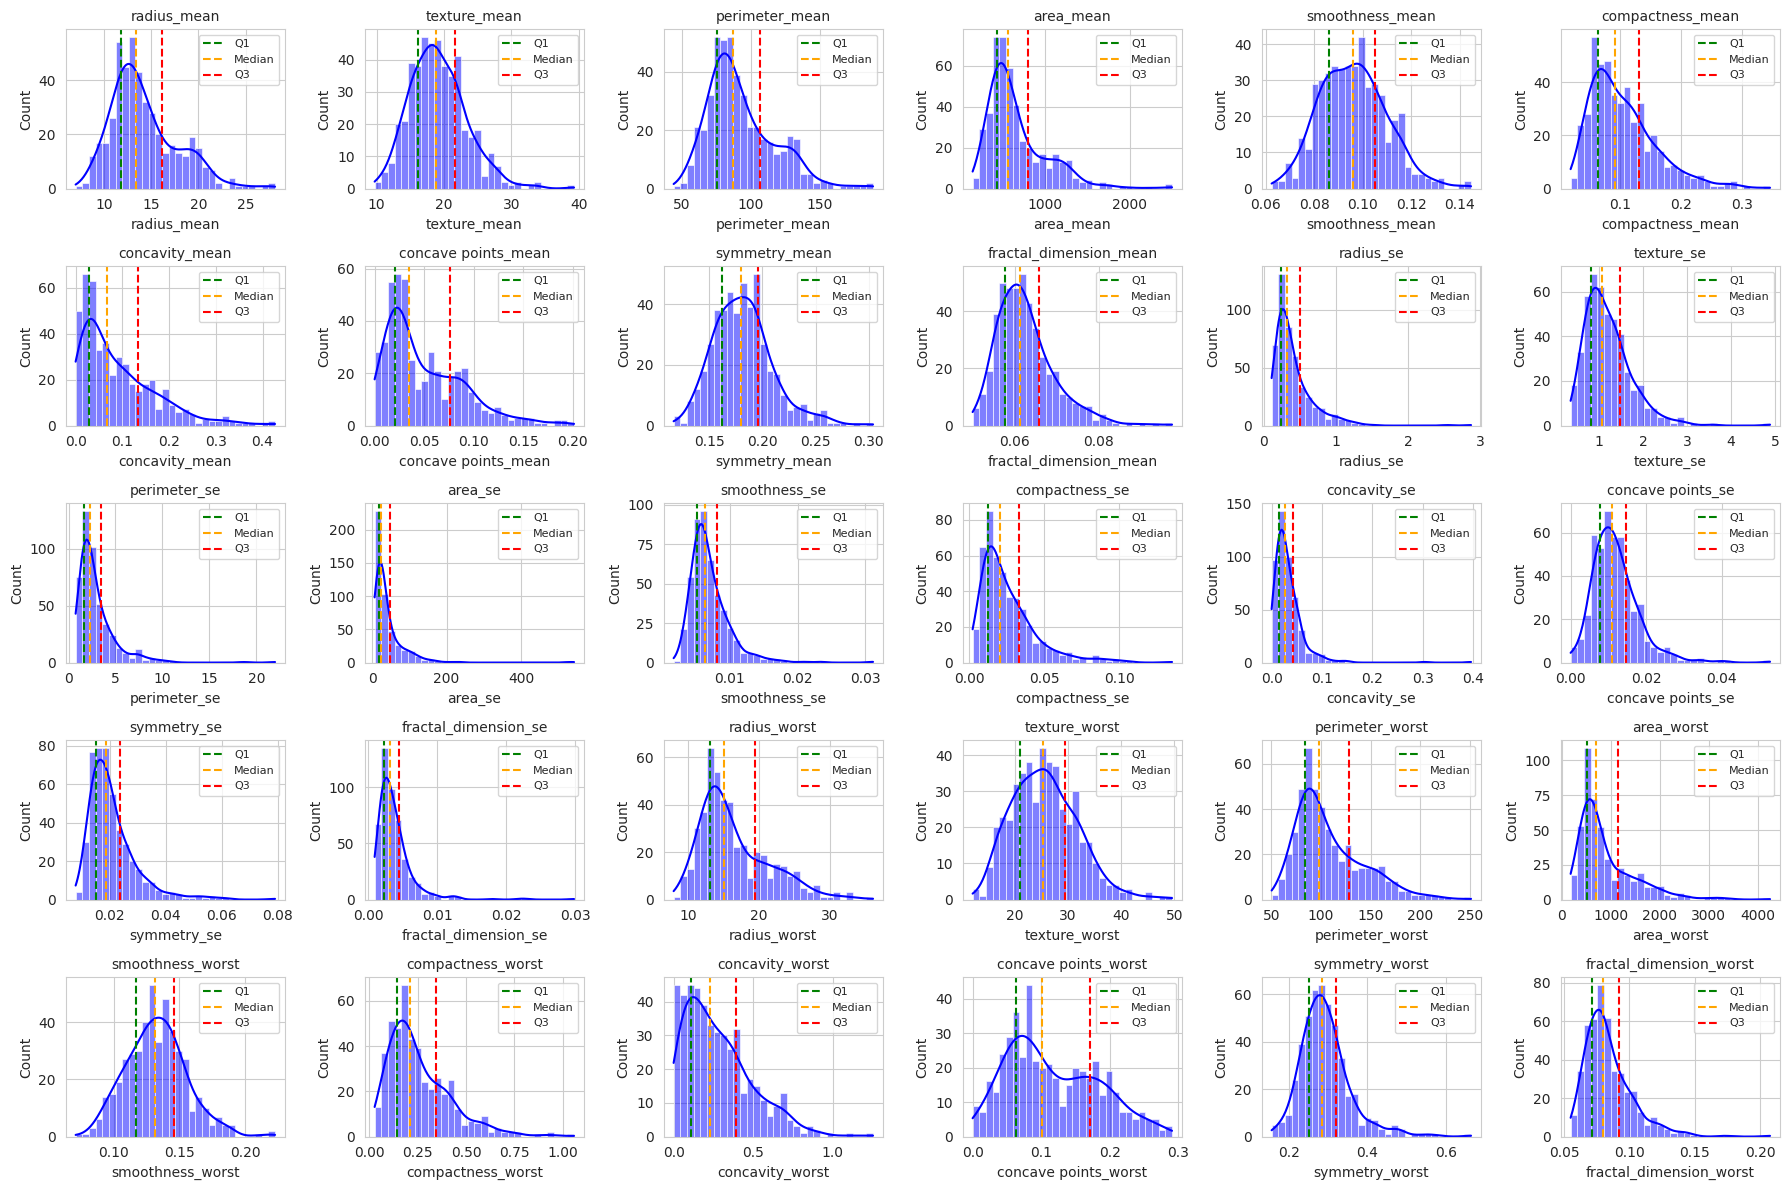

In [13]:
# Select numerical columns (limit to first 30 for clarity)
numeric_columns = UpdatedData.select_dtypes(include=['number']).columns[:30]

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through columns and plot histograms
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 6, i)  # 5 rows, 6 columns layout
    sns.histplot(data[col], bins=30, kde=True, color="blue")

    # Plot percentiles
    plt.axvline(data[col].quantile(0.25), color='green', linestyle='dashed', label="Q1")
    plt.axvline(data[col].median(), color='orange', linestyle='dashed', label="Median")
    plt.axvline(data[col].quantile(0.75), color='red', linestyle='dashed', label="Q3")

    plt.title(col, fontsize=10)  # Feature name as title
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


#### 🔍 Check for Mixed Data Types in Columns
---

In [14]:
# Check for mixed data types in each column
for col in UpdatedData.columns:
    unique_types = data[col].apply(type).nunique()
    if unique_types > 1:
        print(f"⚠️ Column '{col}' contains mixed data types!")
        break
else:
    print("✅ All columns have consistent data types.")

# Use apply(type).nunique() to count the number of unique data types in the column.
# If the count is greater than 1, print a warning and stop checking further.

✅ All columns have consistent data types.


#### 🔍Check the unique values in the 'diagnosis' column
---

In [15]:
# This helps to identify the different categories in the target variable
print("Unique values in 'diagnosis' column:", UpdatedData.diagnosis.unique())

Unique values in 'diagnosis' column: ['M' 'B']


#### 📋 Display feature names

In [16]:
print("\n📌 Feature Names in Dataset:")
print("\n".join(UpdatedData.columns)) #Printed vertically, making it easier to read

# OR print(data.columns) OUTPUT Index(['Name', 'Age', 'Salary', 'Department']


📌 Feature Names in Dataset:
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [17]:
benign_count = UpdatedData['diagnosis'].value_counts()['B']
malignant_count = UpdatedData['diagnosis'].value_counts()['M']

print(f" Number of Benign (B) cases: {benign_count}")
print(f" Number of Malignant (M) cases: {malignant_count}")

 Number of Benign (B) cases: 280
 Number of Malignant (M) cases: 188


#### 2️⃣ Pie chart for Benign vs. Malignant
---

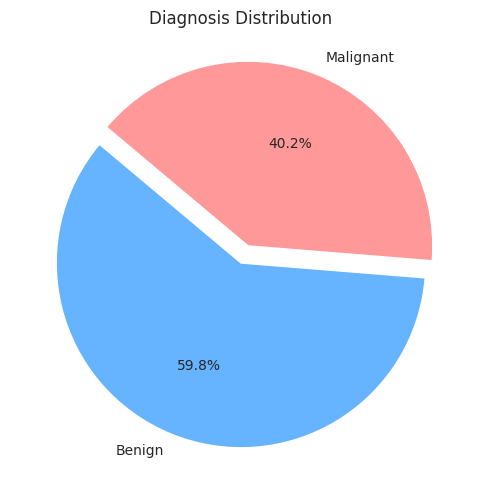

In [18]:
# Define labels and colors
labels = ['Benign', 'Malignant']
colors = ['#66b3ff', '#ff9999']  # Blue for Benign, Red for Malignant
sizes = [benign_count, malignant_count]  # Values for pie chart

# Create pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%',
    colors=colors, startangle=140, explode=[0, 0.1]
) # %1.1f%% 	Shows percentage values inside slices. %1.1f → One decimal place (e.g., 25.3), %% → Displays the % symbol.
# startangle Rotates chart to start at a specific angle. ,Helps adjust slice orientation for better readability.
plt.title("Diagnosis Distribution")
plt.show()

#### 3️⃣ Countplot (Target Class Distribution)

---

**NOTE** : Seaborn's countplot automatically handles categorical variables, even if they are in string format ("M" and "B").

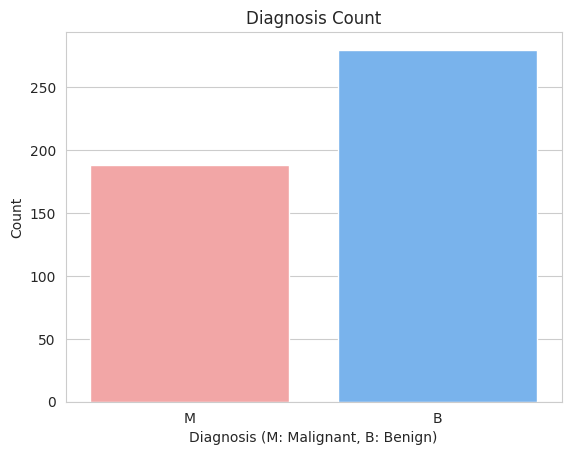

In [19]:
sns.countplot(x='diagnosis', data=UpdatedData, palette=['#ff9999','#66b3ff'])
plt.title("Diagnosis Count")
plt.xlabel("Diagnosis (M: Malignant, B: Benign)")
plt.ylabel("Count")
plt.show()

#### 🔄 Count number of features & traget


---



In [20]:
num_features = data.shape[1] - 1  # Excluding target column, .shape[1]  count the number of columns
target_column = 'diagnosis'
total_patients = data.shape[0] # .shape[0]  count the number of rows

In [21]:
# Display dataset details
print("\n📂 Dataset Information:")
print(f"📌 Number of Features: {num_features}")
print(f"🎯 Target Column: {target_column}")
print(f"📊 Total Number of Patients: {total_patients}")
print(f"✅ Total Benign (B) Patients: {benign_count}")
print(f"⚠️ Total Malignant (M) Patients: {malignant_count}")


📂 Dataset Information:
📌 Number of Features: 31
🎯 Target Column: diagnosis
📊 Total Number of Patients: 468
✅ Total Benign (B) Patients: 280
⚠️ Total Malignant (M) Patients: 188


#### 🔹 Label Encoding
---

In [22]:
UpdatedData["diagnosis"] = UpdatedData["diagnosis"].map({"M": 1, "B": 0})
# Print unique values to confirm the conversion
print("✅ Unique values in 'diagnosis' after conversion:", UpdatedData["diagnosis"].unique())


✅ Unique values in 'diagnosis' after conversion: [1 0]


#### 🔥 4️⃣ Correlation Heatmap
---
* Red (1.0) = Highly correlated
* Blue (-1.0) = Strong negative correlation
* White (0) = No correlation

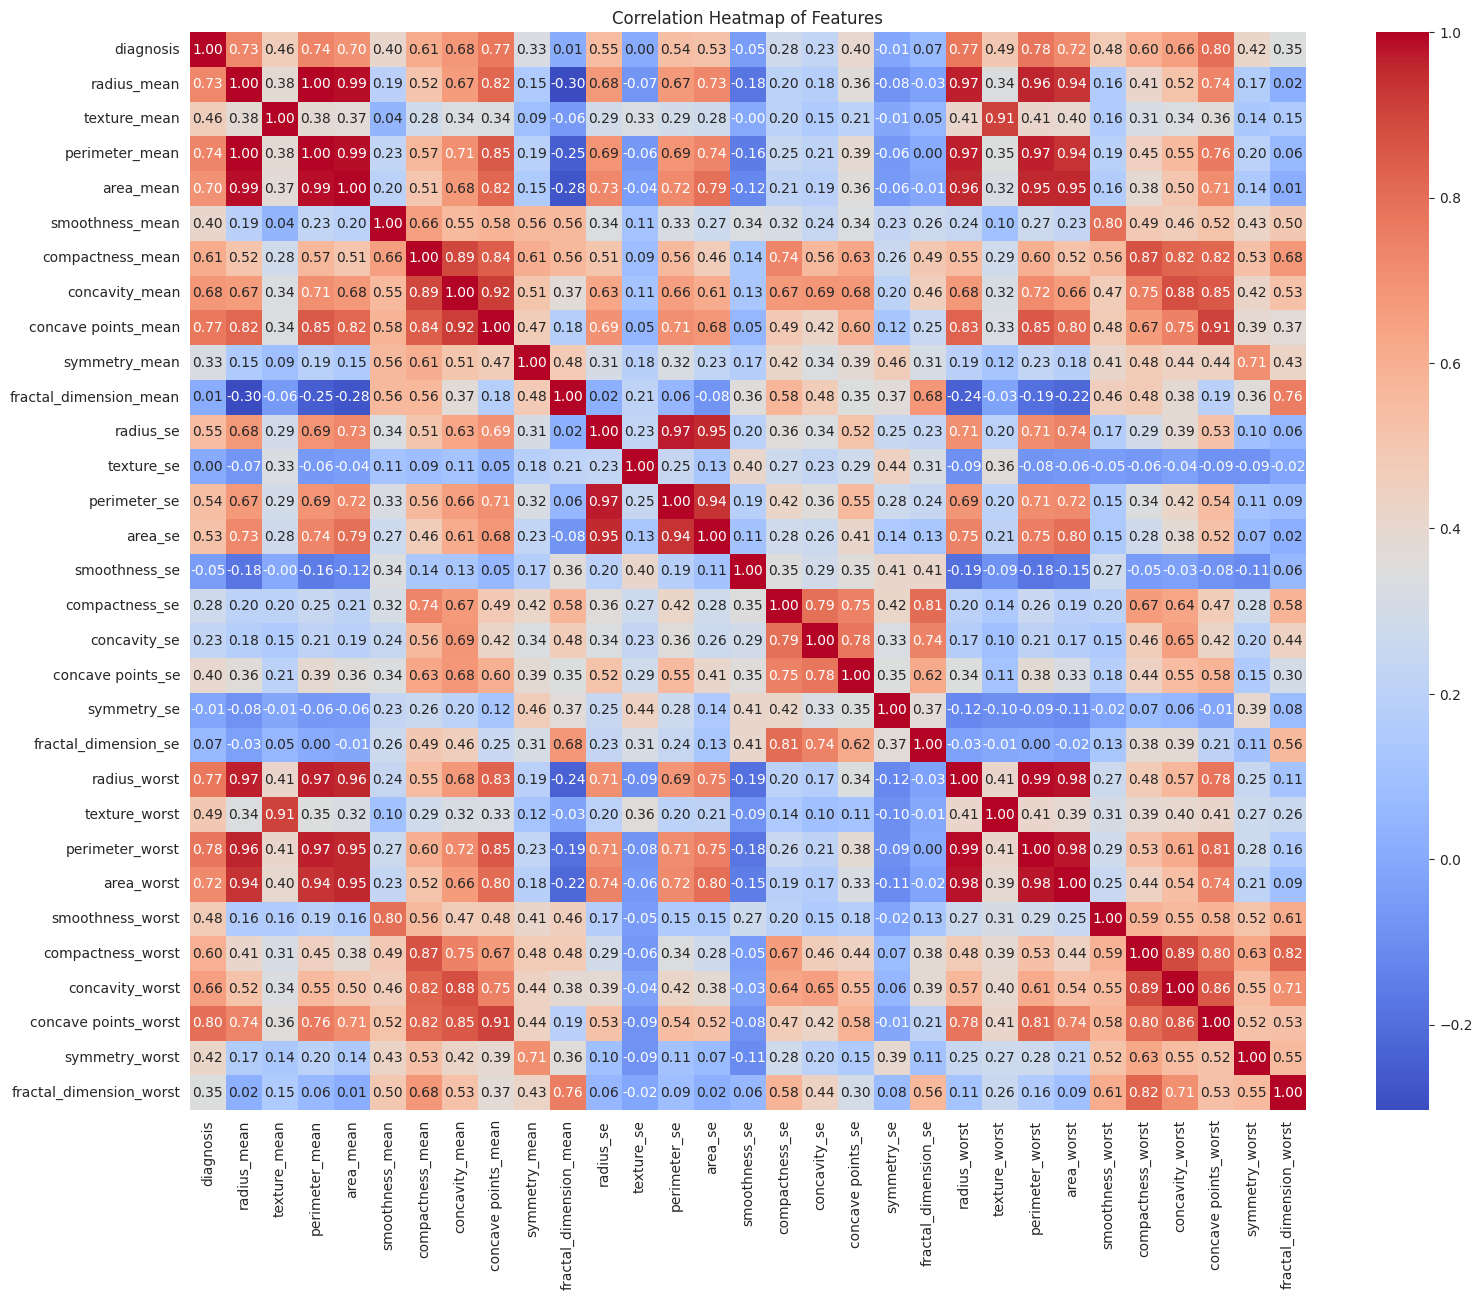

In [23]:
# To analyze correlations between features and the target
plt.figure(figsize=(18, 14))
sns.heatmap(UpdatedData.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Conclusion from this heatmap
**🔹 Features Positively Correlated with Diagnosis (Malignancy)**

---
These features have high positive correlation with the "diagnosis" column (closer to +1), meaning that their values tend to be higher in malignant tumors:

* Radius (mean, worst)
* Perimeter (mean, worst)
* Area (mean, worst)
* Concavity (mean, worst)
* Concave Points (mean, worst)
* Compactness (mean, worst)

**📝 Conclusion:**

Higher values of these features are associated with **malignant tumors**. Larger tumor size and irregular shapes indicate malignancy.

**🔹 Features Negatively Correlated with Diagnosis (Malignancy)**


---


These features have high negative correlation with the "diagnosis" column (closer to -1), meaning that their values tend to be higher in benign tumors:

* Smoothness (mean, worst)
* Symmetry (mean, worst)
* Fractal Dimension (mean, worst)

**📝 Conclusion:**
Higher values of these features are associated with benign tumors. Benign tumors tend to have smoother, more symmetrical structures with less complexity.

# 📌 **Step 3: Data Preprocessing &Splitting**
---
---

### 1) Define features (X) and target variable (y)


---






In [24]:
X = UpdatedData.drop(columns=['diagnosis'])
y = UpdatedData['diagnosis']

### 2) ✂️ Split into training and test sets (80% training, 20% testing)
---

In [25]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                UpdatedData.drop('diagnosis', axis=1),
                UpdatedData['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (374, 30)
Shape of test set: (94, 30)


### 3) 🎯 Apply Z-score Standardization

---

👉 If you don't save the scaler, your test/new data won't be transformed in the same way, leading to incorrect predictions.

👉 Always save the scaler along with your trained model to ensure the same preprocessing is applied consistently.

In [26]:
# Define the scaler path
scaler_path = "/content/drive/MyDrive/Breast Cancer Classification/scaler.pkl"

# Initialize and fit the scaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)  # Fit and transform training data

# Save the scaler to the specified path
joblib.dump(ss, scaler_path)

#  Check if the file was saved successfully
if os.path.exists(scaler_path):
    print(f"✅ Scaler saved successfully at: {scaler_path}")
else:
    print(f"❌ Error: Scaler could not be saved at {scaler_path}.")

# Transform the test data using the same scaler (to prevent data leakage)
X_test = ss.transform(X_test)


✅ Scaler saved successfully at: /content/drive/MyDrive/Breast Cancer Classification/scaler.pkl


# 📌 **Step 4: Classification Models**

---
---


In [27]:
#  Start with an empty dictionary and update it dynamically after model training for saving the model accuracies for comparision
model_result = {}

## 1️⃣ **Logistic Regression**

---


#### 1)  Train the Logistic Regression model

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

#### 2) Predictions & Evaluation

In [29]:
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]


#### 3)  Metrics

**NOTE** : AUC-ROC Score
* AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a metric used to evaluate classification models.
* It measures the ability of the model to distinguish between classes (e.g., benign vs. malignant).
* AUC-ROC ranges from 0 to 1, where:
      1.0 → Perfect classifier
      0.5 → Random guess
      0.0 → Worst classifier


In [30]:

print("📊 Logistic Regression Performance:")

# Training Accuracy
y_train_pred_lr = lr_model.predict(X_train)
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"🔹 Training Accuracy: {train_acc_lr:.4f}")

# Test Accuracy
test_acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"🔹 Test Accuracy: {test_acc_lr:.4f}")

# AUC-ROC Score
roc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"🔹 AUC-ROC Score: {roc_lr:.4f}")

# Classification Report
print(classification_report(y_test, y_pred_lr))

# Save Results
model_result["Logistic Regression"] = [train_acc_lr, test_acc_lr, roc_lr]


📊 Logistic Regression Performance:
🔹 Training Accuracy: 0.9893
🔹 Test Accuracy: 0.9362
🔹 AUC-ROC Score: 0.9828
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.91      0.91      0.91        34

    accuracy                           0.94        94
   macro avg       0.93      0.93      0.93        94
weighted avg       0.94      0.94      0.94        94



### 4) Confusion Matrix

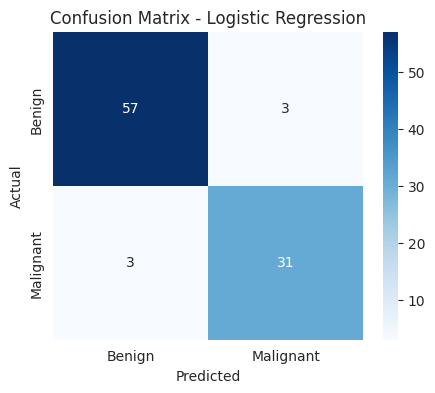

In [31]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## 2️⃣ **SUPPORT VECTOR MACHINE (SVM)**

---

In [32]:
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

SVC(probability=True)

In [33]:
# Predictions
y_train_pred_svm = model_svm.predict(X_train)
y_pred_svm = model_svm.predict(X_test)
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]

In [34]:
# Training & Test Accuracy
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_pred_svm)


In [35]:
# Evaluation Metrics
print("\n📊 SVM:")
roc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"🔹 Training Accuracy: {train_acc_svm:.4f}")
print(f"🔹 Test Accuracy: {test_acc_svm:.4f}")
print(f"🔹 AUC-ROC Score: {roc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

# Save Results
model_result["SVM"] = [train_acc_svm, test_acc_svm, roc_svm]



📊 SVM:
🔹 Training Accuracy: 0.9866
🔹 Test Accuracy: 0.9574
🔹 AUC-ROC Score: 0.9882
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.97      0.91      0.94        34

    accuracy                           0.96        94
   macro avg       0.96      0.95      0.95        94
weighted avg       0.96      0.96      0.96        94



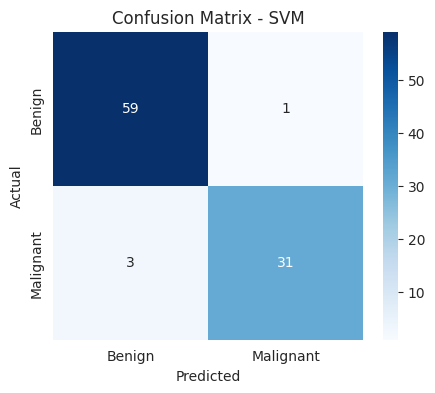

In [36]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

## 3️⃣ **K-NEAREST NEIGHBORS (KNN)**

---

In [37]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# Predictions
y_train_pred_knn = model_knn.predict(X_train)
y_pred_knn = model_knn.predict(X_test)

In [39]:
# Training & Test Accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_pred_knn)


In [40]:
print("\n📊 KNN Performance:")
# Evaluation Metrics
print(f"🔹 Training Accuracy: {train_acc_knn:.4f}")
print(f"🔹 Test Accuracy: {test_acc_knn:.4f}")
roc_svm = roc_auc_score(y_test, y_pred_knn)
print(f"🔹 AUC-ROC Score: {roc_svm:.4f}")
print(classification_report(y_test, y_pred_knn))

# ✅ Save Results
model_result["KNN"] = [train_acc_knn, test_acc_knn, roc_svm]  # KNN doesn't support probability for AUC-ROC



📊 KNN Performance:
🔹 Training Accuracy: 0.9733
🔹 Test Accuracy: 0.9574
🔹 AUC-ROC Score: 0.9412
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.88      0.94        34

    accuracy                           0.96        94
   macro avg       0.97      0.94      0.95        94
weighted avg       0.96      0.96      0.96        94



 Class 1 Recall (0.88) is lower than Precision (1.00) → This suggests that while all predicted positives are correct, some actual positives are missed (model is slightly conservative in predicting Class 1).

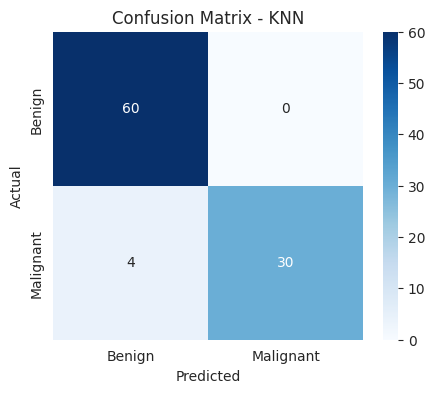

In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

### COMPARISON TABLE & Best Model

---



In [42]:
best_model_name = max(model_result, key=lambda k: model_result[k][1])  # Select model with highest test accuracy
best_model = eval(f"model_{best_model_name.lower().replace(' ', '_')}")  # Retrieve model object dynamically

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ Best Model Saved: {best_model_name} with Test Accuracy: {model_result[best_model_name][1]:.4f}")

# ---------------------------- COMPARISON TABLE ----------------------------
comparison_df = pd.DataFrame(model_result, index=["Training Accuracy", "Test Accuracy", "AUC-ROC"]).T
print("\n📊 Model Comparison Table:")
print(comparison_df)


✅ Best Model Saved: SVM with Test Accuracy: 0.9574

📊 Model Comparison Table:
                     Training Accuracy  Test Accuracy   AUC-ROC
Logistic Regression           0.989305       0.936170  0.982843
SVM                           0.986631       0.957447  0.988235
KNN                           0.973262       0.957447  0.941176


# 📌 **Step 5: Saving the best model**

---
---

In [43]:
# Save the trained model
model_path = "/content/drive/MyDrive/Breast Cancer Classification/svm_model.pkl"
joblib.dump(model_svm, model_path)

# Verify if the model is saved
if os.path.exists(model_path):
    print(f"\n✅ Model saved successfully at: {model_path}")
else:
    print("❌ Model saving failed!")



✅ Model saved successfully at: /content/drive/MyDrive/Breast Cancer Classification/svm_model.pkl


In [44]:
# Load the Scaler
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
    print(f"✅ Scaler loaded successfully from: {scaler_path}")
else:
    print(f"❌ Error: Scaler file not found at {scaler_path}. Exiting...")
    exit()

#  Upload CSV Button
upload_button = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_button)

# Function to Process Uploaded CSV & Predict
def process_and_predict(change):
    if upload_button.value:
        uploaded_file = list(upload_button.value.values())[0]  # Get uploaded file
        file_content = io.BytesIO(uploaded_file['content'])  # Read file content

        try:
            # Load CSV into DataFrame
            new_data = pd.read_csv(file_content)
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            return

        # Remove 'ID' Column if Present
        if 'id' in new_data.columns:
            new_data = new_data.drop(columns=['id'])

        # Extract Expected Columns Directly from the Uploaded CSV
        feature_columns = new_data.columns.tolist()

        # Convert Data to Numeric (Handles String Errors)
        new_data = new_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
        new_data = new_data.fillna(0)  # Replace missing values with 0

        # Apply StandardScaler
        new_data_scaled = scaler.transform(new_data)

        # Make Predictions using SVM Model
        predictions = model_svm.predict(new_data_scaled)

        # Save Predictions
        new_data["Predicted_Class"] = predictions
        output_file = "/content/svm_predictions.csv"
        new_data.to_csv(output_file, index=False)

        print("\n✅ Predictions saved to", output_file)
        download_button.layout.visibility = 'visible'

# Bind Function to Upload Button
upload_button.observe(process_and_predict, names='value')

# Download CSV Button (Hidden Initially)
def download_predictions(change):
    files.download("/content/svm_predictions.csv")

download_button = widgets.Button(description="Download Predictions", layout=widgets.Layout(visibility='hidden'))
download_button.on_click(download_predictions)
display(download_button)


✅ Scaler loaded successfully from: /content/drive/MyDrive/Breast Cancer Classification/scaler.pkl


FileUpload(value={}, accept='.csv', description='Upload')

Button(description='Download Predictions', layout=Layout(visibility='hidden'), style=ButtonStyle())

# 📌 **Step 6: Make 🎗️ Breast Cancer Classification Web App using Gradio**

---
---

In [62]:
#  Load Model & Scaler
model_path = "/content/drive/MyDrive/Breast Cancer Classification/svm_model.pkl"
scaler_path = "/content/drive/MyDrive/Breast Cancer Classification/scaler.pkl"

# Load the trained SVM model
if os.path.exists(model_path):
    model_svm = joblib.load(model_path)
else:
    raise FileNotFoundError(f"❌ Model file not found at {model_path}")

# Load the scaler
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
else:
    raise FileNotFoundError(f"❌ Scaler file not found at {scaler_path}")

# Expected Features
expected_columns = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
    "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
    "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]

def predict_from_csv(file):
    df = pd.read_csv(file)

    # Preserve 'id' column if present
    if 'id' in df.columns:
        id = df['id']  # Keep 'id' as Series (not DataFrame)
    else:
        id = None

    # Remove ID column from processing
    if 'id' in df.columns:
        df = df.drop(columns=['id'])

    # Check for missing columns
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        return f"❌ Error: Missing columns: {missing_columns}"

    # Convert data to numeric & handle missing values
    df = df[expected_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale data
    df_scaled = scaler.transform(df)

    # Predict
    predictions = model_svm.predict(df_scaled)

    # Add Predictions to DataFrame
    df["Predicted_Class"] = ["M" if pred == 1 else "B" for pred in predictions]

    #  Reattach 'id' column if available
    if id is not None:
        df.insert(0, 'id', id)  # Insert 'id' as the first column

    # Save Predictions
    output_file = "/content/Patient_Classification.csv"
    df.to_csv(output_file, index=False)

    return output_file  # Returns the file path for download


def manual_input_page():
    inputs = [gr.Textbox(label=col.replace("_", " ").capitalize()) for col in expected_columns]

    return gr.Interface(
        fn=predict_from_manual_input,
        inputs=inputs,
        outputs=gr.Text(label="🔎 Prediction Result"),
        title="📝 Enter Patient Data",
        description="Manually input patient biopsy data and predict whether the case is benign or malignant.",
        allow_flagging="never"
    )

#  **Welcome Page**
def welcome_page():
    with gr.Blocks() as page:
        gr.Markdown(
            """
            <h1 style="text-align: center;">🎗️ Breast Cancer Classification 🎗️</h1>

            <p style="text-align: center;"><strong>Early detection saves lives!</strong></p>

            <p style="text-align: center;">Women aged 40+ should have regular check-ups to detect cancer in its early stages.</p>

            <p style="text-align: center;"><strong>Choose an option from the above ⬆️</strong></p>
            """,
            elem_id="centered-text"
        )

    return page

# **CSV Upload Page**
def upload_csv_page():
    return gr.Interface(
        fn=predict_from_csv,
        inputs=gr.File(label="📤 Upload CSV File", type="filepath"),  #
        outputs=gr.File(label="📥 Download Predictions"),
        title="📑 Upload Patient Records for Classification",
        description="Upload a CSV file with patient data. The system will process and return the predicted results.",
    )


def predict_from_manual_input(*inputs):
    try:
        # Ensure inputs are converted to numeric values (handle empty or incorrect inputs)
        numeric_inputs = []
        for i in inputs:
            try:
                numeric_inputs.append(float(i))
            except ValueError:
                return "❌ Error: Please enter valid numerical values!"

        # Convert list to NumPy array and reshape
        data = np.array(numeric_inputs).reshape(1, -1)

        # Convert to DataFrame with correct feature names
        df = pd.DataFrame(data, columns=expected_columns)

        # Scale the input using the loaded scaler
        df_scaled = scaler.transform(df)

        # Make prediction using the SVM model
        prediction = model_svm.predict(df_scaled)[0]

        # Convert output to readable label
        return "🔴 Malignant" if prediction == 1 else "🟢 Benign"

    except Exception as e:
        return f"❌ Error: {str(e)}"

#  **Launch App**
demo = gr.TabbedInterface(
    [welcome_page(), upload_csv_page(), manual_input_page()],  # ✅ Call functions to return `gr.Blocks`
    tab_names=["🏠 Welcome", "📤 Upload CSV", "📝 Manual Entry"]
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1afb73046134ff6bcd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
